In [1]:
import numpy as np
import instability_rfm_mayer
import joblib
import time
import importlib
from datetime import datetime
import matplotlib.pyplot as plt

from snowpacktools.snowpro import snowpro, pro_plotter, pro_helper

In [2]:
importlib.reload(snowpro)

path_to_pro = './data/AXLIZ1.pro'
#path_to_pro = './data/WFJ2_2017.pro'

# start_readin = time.time()
# profs_mayer = readProfile.read_profile(path_to_pro,remove_soil=True) # 12x faster than default snowpro version!
# end_readin = time.time()
# print('[i]  Reading: {}s'.format(end_readin-start_readin))

start_readin = time.time()
profs, meta_dict = snowpro.read_pro(path_to_pro, res='1h', keep_soil=False, consider_surface_hoar=True)
end_readin = time.time()
print('[i]  Reading: {}s'.format(end_readin-start_readin))

[i]  Reading: 1.1767852306365967s


In [7]:
"""Check surface hoar and soil layers"""
ts = list(profs)[5]
# ts = datetime(2017,2,1,11,0)
# ts = datetime(2021,11,26,11,0)

# profs_mayer['data'][ts]['height']
profs[ts]['height']

array([], dtype=float64)

In [5]:
"""Load RF model of Stephanie Mayer"""
# feature_names = ['viscdefrate', 'rcflat', 'sphericity', 'grainsize', 'penetrationdepth','slab_rhogs']  

# This model was developed using Python 3.7.4 and scikit.learn version 0.22.1
model  = joblib.load('./models/RF_instability_model.sav')

In [8]:
"""Apply RF model (get punstable)"""
importlib.reload(instability_rfm_mayer)
ts = datetime(2017,2,1,11,0)
ts = datetime(2021,11,26,11,0)
profs = instability_rfm_mayer.calc_punstable(profs, model)
# df_features[150000:150050]
profs[ts]['Punstable']

[i]  Stacking features for Punstable RF-model (Mayer et al., 2022): 3.6867787837982178s
[i]  RF-model prediction: 2.126059055328369s


array([0.0310119 , 0.02017857, 0.0135119 , 0.02017857, 0.01267857,
       0.0110119 , 0.29701786, 0.0135119 , 0.0110119 , 0.00517857,
       0.00267857, 0.00267857, 0.00267857, 0.02017857, 0.0097619 ,
       0.00833333, 0.005     , 0.0075    , 0.005     , 0.0025    ,
       0.01166667, 0.03875   , 0.02041667, 0.12333333, 0.22616667,
              nan])

[i]  Stacking features for Punstable RF-model (Mayer et al., 2022): 0.005801200866699219s
[i]  RF-model prediction: 0.05688285827636719s
[i]  Saving figure "AXLIZ_PROF_snp_evo.png" to "./output".
[i]  Visualization of snowpack evolution completed in 4.934802055358887s


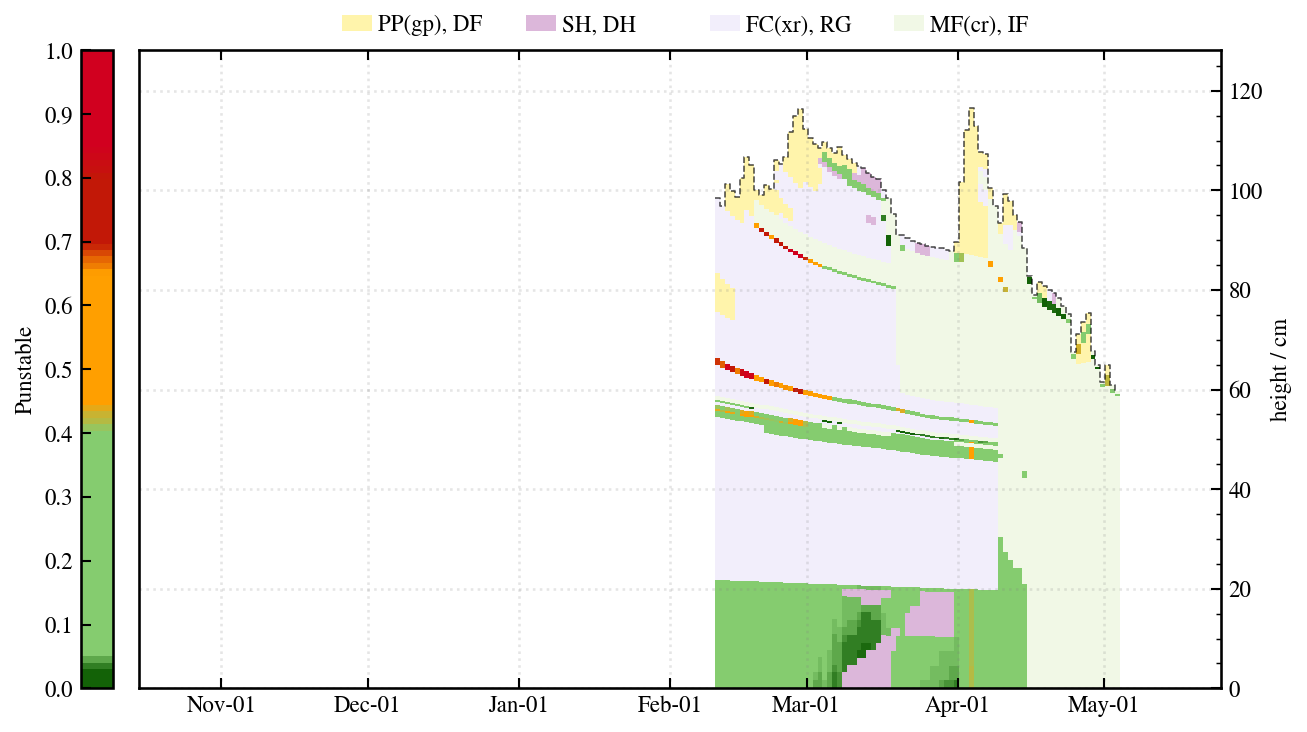

In [16]:
"""Visualize snowpack evolution / punstable / Sk38 + RTA / ... (adapt snowpro.ini)"""

importlib.reload(snowpro)
importlib.reload(pro_plotter)
importlib.reload(pro_helper)
importlib.reload(instability_rfm_mayer)
snowpro.snowpro("./snowpro.ini")